In [11]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='selc_srces.csv'
colfilter = ['Process','Period','PV']

a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict={}

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')
print(procs)

['FTE-SIMECCSG22' 'FTE-SIMELNG17' 'FTE-SIMEPVN17' 'FTE-SIMESOL17'
 'FTE-SIMEWOFL17' 'FTE-SIMEWOFX17' 'FTE-SIMEWON17']


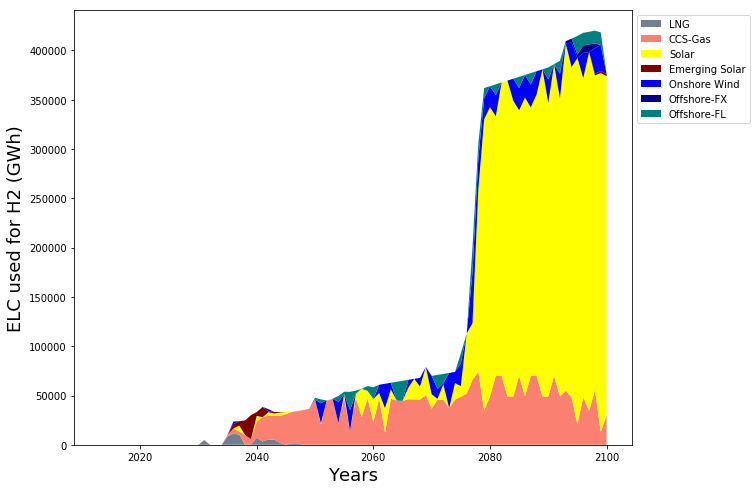

In [13]:
ordlegend=['LNG','CCS-Gas',
           'Solar','Emerging Solar',
           'Onshore Wind','Offshore-FX','Offshore-FL']
colours = ['slategray','salmon',
           'yellow','maroon',
           'blue','darkblue','teal']
fig, ax = plt.subplots(figsize=(10, 8))
pltyrs=range(2013,2101)
ax.stackplot(pltyrs,pltdict['FTE-SIMELNG17'],pltdict['FTE-SIMECCSG22'], 
             pltdict['FTE-SIMEPVN17'],pltdict['FTE-SIMESOL17'],
             pltdict['FTE-SIMEWON17'],pltdict['FTE-SIMEWOFX17'],pltdict['FTE-SIMEWOFL17'],
            labels=ordlegend, colors=colours)
ax.set_xlabel('Years',fontsize='18')
ax.set_ylabel('ELC used for H2 (GWh)',fontsize='18')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
fig.savefig('elc_output_h2test.png',bbox_inches='tight', dpi=300)